## Final Project Submission

Please fill out:
* Student name: Stephen Turk
* Student pace: Part time
* Scheduled project review date/time: 11:00am - 12:00pm March 24, 2020 
* Instructor name: Victor Geislinger 
* Blog post URL:


In [248]:
# Imports that are necessary for the notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Beginning this project the first step was to find a focus for where to advice the stakeholders, Microsoft, with their move into the film industry. The important questions as I saw it were:

**1. Where to enter the market? (In box office vs streaming, domestic vs international)**

**2. At what financial level to enter the market? (large vs. small budget)**

**3. How to enter the market? (what genre show the biggest returns for the smallest investment?)**


After answering these questions it would be possible to give Microsoft stakeholders the best picture of where they should direct funds for entering into the content creation for film industry.

**Question 1: Where to enter the market?**


How is the film industry doing? Outside of the obvious impact of Corona Virus, how is the film industry doing?
To address this question I used a data set from The Numbers film data website. This dataset included total domestic box office and, importantly, inflation adjusted box office for the past 25 years.

In [363]:
yearly_rev_df = pd.read_csv('yearly_revenue_w_inflation.csv')

In [365]:
yearly_rev_df.head() #This data has many things we need, but is a bit ugly.

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Year,Tickets Sold,Total Box Office,Total Inflation\nAdjusted Box Office,Average\nTicket Price,NaN
1,NaN,2020,"985,155,965","$8,974,770,845","$8,974,770,845",$9.11,NaN
2,NaN,2019,"1,246,269,158","$11,353,514,827","$11,353,514,915",$9.11,NaN
3,NaN,2018,"1,311,323,188","$11,946,156,764","$11,946,156,943",$9.11,NaN
4,NaN,2017,"1,225,639,438","$10,993,988,560","$11,165,575,309",$8.97,NaN


In [366]:
yearly_rev_df.columns = yearly_rev_df.iloc[0] #assigning the first row as the columns

In [367]:
yearly_rev_df = yearly_rev_df.dropna(axis=1) #dropping NaN columns

In [368]:
yearly_rev_df = yearly_rev_df.drop([0]) #dropping duplicate first row

In [369]:
yearly_rev_df = yearly_rev_df.drop([1]) #dropping 2020 because it's financial info is incomplete

In [370]:
yearly_rev_df.head() # much better

,Year,Tickets Sold,Total Box Office,Total Inflation\nAdjusted Box Office,Average\nTicket Price
2,2019,"1,246,269,158","$11,353,514,827","$11,353,514,915",$9.11
3,2018,"1,311,323,188","$11,946,156,764","$11,946,156,943",$9.11
4,2017,"1,225,639,438","$10,993,988,560","$11,165,575,309",$8.97
5,2016,"1,301,658,904","$11,259,352,764","$11,858,112,611",$8.65
6,2015,"1,323,266,320","$11,155,138,079","$12,054,956,180",$8.43


In [373]:
yearly_rev_df.info() #Oops!, None of our data is in the right format! We need int or float.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 26
Data columns (total 5 columns):
Year                                   25 non-null object
Tickets Sold                           25 non-null object
Total Box Office                       25 non-null object
Total Inflation
Adjusted Box Office    25 non-null object
Average
Ticket Price                   25 non-null object
dtypes: object(5)
memory usage: 1.2+ KB


In [374]:
yearly_rev_df[yearly_rev_df.columns[0:]] = yearly_rev_df[yearly_rev_df.columns[0:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
#using lambda expression to strip all '$' and ',' from financial numbers.

In [376]:
yearly_rev_df.head(3) # Looking good. Note: most of these floats could be int instead, but for graphing purposes this is largely irrelevant.

,Year,Tickets Sold,Total Box Office,Total Inflation\nAdjusted Box Office,Average\nTicket Price
2,2019.0,1.246269e+09,1.135351e+10,1.135351e+10,9.11
3,2018.0,1.311323e+09,1.194616e+10,1.194616e+10,9.11
4,2017.0,1.225639e+09,1.099399e+10,1.116558e+10,8.97


In [377]:
yearly_rev_df.rename(columns = {'Total Inflation\nAdjusted Box Office':'Inflation Adjusted Box Office'}, inplace = True) #Making a few column names more legible

In [378]:
yearly_rev_df.rename(columns = {'Average\nTicket Price':'Average Ticket Price'}, inplace = True) #Great, now ready to graph.

In [379]:
yearly_rev_df.head(3)

,Year,Tickets Sold,Total Box Office,Inflation Adjusted Box Office,Average Ticket Price
2,2019.0,1.246269e+09,1.135351e+10,1.135351e+10,9.11
3,2018.0,1.311323e+09,1.194616e+10,1.194616e+10,9.11
4,2017.0,1.225639e+09,1.099399e+10,1.116558e+10,8.97


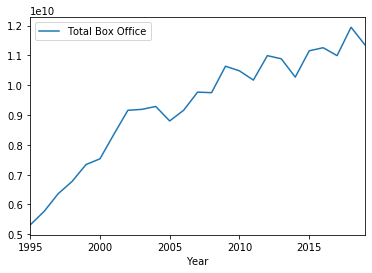

In [380]:
yearly_rev_df.plot('Year', 'Total Box Office', kind='line'); #Quick view of domestic box office for past 25 years

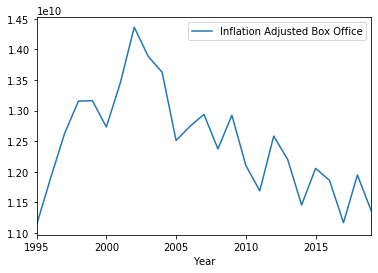

In [381]:
yearly_rev_df.plot('Year', 'Inflation Adjusted Box Office', kind='line'); #Looked pretty good, what if we adjust for inflation

This is a very telling graph for the movie industry. While yearly gross has been going up fairly steadily it has not been keeping pace with inflation. It seems like domestic (USA) might not be the most recommended entry point into the market. Note however, that this is domestic box office. 

Since we don't want to enter the domestic box office due to declining revenues what are the competing choices?

In [441]:
observer_investment = pd.read_csv('observer_stream_investment.csv') #getting a picture of where the streaming industry is right now

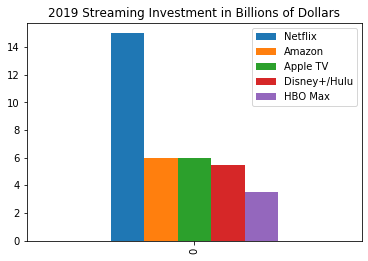

In [445]:
observer_investment.plot(kind='bar', title='2019 Streaming Investment in Billions of Dollars');#data from The Observer

Streaming seems like a much safer investment, especially considering the current worldwide pandemic and the reliance on "at home" entertainment. After a look into the state of online streaming it seems that Netflix, Amazon, Apple, HBO and Hulu/Disney(Hulu is owned by Disney) agree and are investing heavily into this industry.


Looking at Netflix as an example of immediately available growth as well as a roadmap to future growth for Microsoft seems, pretty clear. Microsoft already has a fledgling streaming service offered by their xbox streaming platform as well as global reach to computers via their Windows platform.

So to answer both aspects of our first question. Microsoft should move into streaming and focus on a worldwide audience instead of focusing on only the local market.


**Question 2: At what financial level should Microsoft make features for the international market?**

Even though we want to move into streaming instead of general box office, vastly more data exists about production budgets and box office gross than is available about streaming services. So let's look at some movie data sets over time and see what movies make the most money.

In [456]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') #the numbers has a fairly comprehensive list of movies

In [448]:
tn_movie_budgets.head(3) #this has useful data because it can show us what range of investment has the best amount of payoff.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [450]:
tn_movie_budgets.info()#we also have near 6k different movies so a fairly complete list. Let's clean it up a bit and see what we find.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [457]:
tn_movie_budgets[tn_movie_budgets.columns[3:]] = tn_movie_budgets[tn_movie_budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
#first we need to convert the data into int64 so we can manipulate it more easily

In [452]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


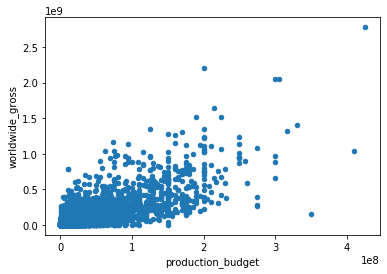

In [458]:
tn_movie_budgets.plot('production_budget', 'worldwide_gross', kind='scatter'); #let's see how production budget relates to worldwide gross.

well that's a lot, and difficult to draw any specific recommendations from. Next we'll try to eliminate the influence
of inflation on these numbers as this data set includes movies from as far back as 1970 and those will invariably have much smaller production budgets as well as box office gross.

In [459]:
tn_movie_budgets['percentage_gain'] = (tn_movie_budgets['worldwide_gross'] / tn_movie_budgets['production_budget'])
#created new column percenage gain which divided the worldwide gross by the production budget. A return of 1 would mean a movie made back it's budget.

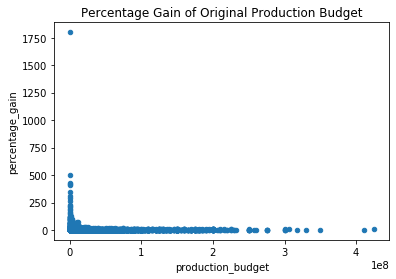

In [461]:
tn_movie_budgets.plot('production_budget', 'percentage_gain', kind='scatter', title='Percentage Gain of Original Production Budget'); #this graph shows that some outliers are significantly impacting the ability to see the data

In [463]:
len(tn_movie_budgets) #How much data are we looking at?

5782

In [466]:
tn_movie_budgets.sort_values(by='percentage_gain', ascending=False, inplace=True) #let's sort the data to get a better idea of the outliers

In [467]:
tn_movie_budgets # looks like there are some null values clogging up the graphing

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1800.000000
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,431.517853
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,413.833333
...,...,...,...,...,...,...,...
4848,49,"Sep 2, 2016",Antibirth,2500000,0,0,0.000000
4849,50,"Feb 2, 2016",The Rise of the Krays,2500000,0,0,0.000000
4989,90,"Feb 8, 2013",Small Apartments,2000000,0,0,0.000000
4988,89,"Dec 31, 2012",Highway,2000000,0,0,0.000000


In [468]:
tn_movie_budgets['worldwide_gross'].value_counts() #luckily there are not too many null values

0            367
8000000        9
2000000        6
7000000        6
11000000       4
            ... 
47158652       1
29197694       1
166000000      1
42843521       1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [470]:
no_ww_gross = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] == 0].index    
tn_movie_budgets.drop(no_ww_gross , inplace=True)# Delete these row indexes from dataFrame

In [471]:
tn_movie_budgets['worldwide_gross'].value_counts() # all clear

8000000      9
2000000      6
7000000      6
11000000     4
4000000      4
            ..
47158652     1
29197694     1
166000000    1
42843521     1
104267443    1
Name: worldwide_gross, Length: 5355, dtype: int64

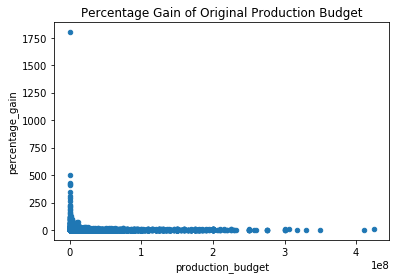

In [476]:
tn_movie_budgets.plot('production_budget', 'percentage_gain', kind='scatter', title='Percentage Gain of Original Production Budget');
#not much better, but we can see that the extreme outliers on the far side of the production budget don't have a vastly higher percent gain.

Because Microsoft is just entering the market I think we can safely exclude the film budgets of \\$200 million or more as well as the film budgets of \\$20 million or less as with current budgets and adjusting for inflation \\$20 million is on the low end of film budgets currently.

In [479]:
over_200 = tn_movie_budgets[tn_movie_budgets['production_budget'] > 200000000].index   
# Delete the rows from the dataframe with over $200,000,000 budgets 
tn_movie_budgets.drop(over_200 , inplace=True)

In [480]:
under_20 = tn_movie_budgets[tn_movie_budgets['production_budget'] < 20000000].index
# Delete the rows from the dateframe with under $20,000,000 budgets
tn_movie_budgets.drop(under_20, inplace=True)

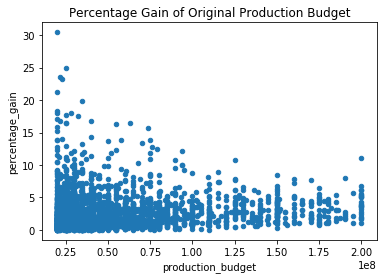

In [482]:
tn_movie_budgets.plot('production_budget', 'percentage_gain', kind='scatter', title='Percentage Gain of Original Production Budget');

This is a much more usefull graph visually. There is a definite trend of less percentage gain as you increase production budget toward \\$200 Million. Because Microsoft would be just beginning in this space and because the focus is on targeting an international audience, I would recommend that Microsoft targets relatively lower budget films in \\$20 - \\$50 million range.

In [483]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,percentage_gain
count,2646.000000,2.646000e+03,2.646000e+03,2.646000e+03,2646.000000
mean,50.834089,5.655848e+07,6.945582e+07,1.566480e+08,2.654057
std,28.922530,3.991962e+07,7.649003e+07,1.985017e+08,2.698864
min,1.000000,2.000000e+07,0.000000e+00,5.000000e+03,0.000192
25%,26.000000,2.800000e+07,2.009335e+07,3.538998e+07,0.940518
50%,51.000000,4.000000e+07,4.549819e+07,8.713433e+07,1.931246
75%,76.000000,7.000000e+07,8.974746e+07,1.961465e+08,3.422282
max,100.000000,2.000000e+08,7.000596e+08,2.208208e+09,30.421557


**Question 3: What kinds of features should Microsoft make in the \\$20 - \\$50 million range?**

Here I first attempted to use the IMDB dataset provided as it contained a huge amount of films in the data set.

In [484]:
imdbtb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [485]:
len(imdbtb) #lots of movies

146144

In [486]:
imdbtb.head() #unfortunately the data for genres contains the ability for each movie to have multiple different genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [487]:
imdbtb['genres'].nunique() #each combination of genres is classed as a unique genre...

1085

In [488]:
genre_list = imdbtb['genres'] #creating a list of all those genres in order to split

In [489]:
split_genre_list = []  #splitting the list
for item in genre_list:
    item = str(item).split(',')
    split_genre_list += item
    
len(split_genre_list)

234958

In [490]:
unique_genres = set(split_genre_list) #Getting the total amount of genres

In [491]:
genre_dict = {} #Counting the instances of each genre in the list
for genre in unique_genres:
    genre_dict[genre] = split_genre_list.count(genre)
genre_dict

{'Music': 4314,
 'Short': 11,
 'Drama': 49883,
 'Sci-Fi': 3365,
 'Romance': 9372,
 'Adult': 25,
 'Reality-TV': 98,
 'Talk-Show': 50,
 'Western': 467,
 'Thriller': 11883,
 'Biography': 8722,
 'Horror': 10805,
 'Fantasy': 3516,
 'nan': 5408,
 'Action': 10335,
 'News': 1551,
 'Adventure': 6465,
 'Documentary': 51640,
 'Crime': 6753,
 'Game-Show': 4,
 'Comedy': 25312,
 'Family': 6227,
 'Mystery': 4659,
 'Sport': 2234,
 'War': 1405,
 'Musical': 1430,
 'Animation': 2799,
 'History': 6225}

Yay! We have a dictionary of the number of times each genre occurs.

In [492]:
sorted_genres = {keys: values for keys, values in sorted(genre_dict.items(), key = lambda item: item[1], reverse = True)}
#sorted most to least

In [494]:
sorted_genres

{'Documentary': 51640,
 'Drama': 49883,
 'Comedy': 25312,
 'Thriller': 11883,
 'Horror': 10805,
 'Action': 10335,
 'Romance': 9372,
 'Biography': 8722,
 'Crime': 6753,
 'Adventure': 6465,
 'Family': 6227,
 'History': 6225,
 'nan': 5408,
 'Mystery': 4659,
 'Music': 4314,
 'Fantasy': 3516,
 'Sci-Fi': 3365,
 'Animation': 2799,
 'Sport': 2234,
 'News': 1551,
 'Musical': 1430,
 'War': 1405,
 'Western': 467,
 'Reality-TV': 98,
 'Talk-Show': 50,
 'Adult': 25,
 'Short': 11,
 'Game-Show': 4}

In [495]:
sorted_genres_df = pd.DataFrame.from_dict(sorted_genres, orient='index') #making the dict into a df

In [496]:
sorted_genres_df = sorted_genres_df.rename(columns={0: "Number of Movies"}) #fixing some titles

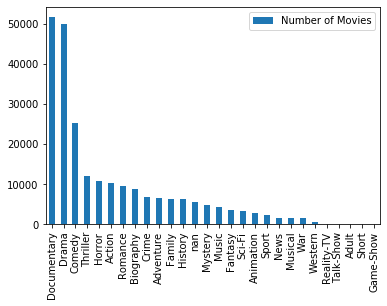

In [497]:
sorted_genres_df.plot(kind='bar') 

Well, this definitely gives a result, but probably not what we're looking for. Because, the high number of documentaries does not mean they are the most profitible. Also, the fact that a movie can have many different genres means that catch all categories are obviously going to have more entries. Drama can really be a catch-all, therfore it is no suprise it comes in as the second most films.
Maybe we'll have more luck with less unwieldy data.

In [498]:
opus_data = pd.read_csv('OpusMovieData.csv') #this is a near 2000 movie dataset from Opus Media, who make "The Numbers" website.


In [500]:
opus_data.head() #This is great, we have more accessible genres as well as internation, domestic and production budget.

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN


In [501]:
opus_data['total_box_office'] = (opus_data['domestic_box_office'] + opus_data['international_box_office']) #adding a worldwide box office

In [503]:
opus_data['percentage_gain'] = (opus_data['total_box_office'] / opus_data['production_budget']) #creating percentage gain again to adjust for inflation

In [504]:
opus_data.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,percentage_gain
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN,63320521,6.332052
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN,32430721,3.243072
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN,11924041,1.192404
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191,2.671619
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN,163876815,16.387681


In [507]:
opus_data.sort_values(by='percentage_gain', ascending=False, inplace=True)
opus_data.head(3) #sorting by percentage gain

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,percentage_gain
931,Les Intouchables,2011,164220100,10800000,13182281,471690764,R,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,110.0,484873045,44.895652
733,The King’s Speech,2010,143880100,15000000,138797449,292023719,R,Dramatization,Original Screenplay,Live Action,Drama,0.0,118.0,430821168,28.721411
338,Slumdog Millionaire,2008,2110100,14000000,141330703,243199737,R,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,116.0,384530440,27.466460


In [508]:
opus_data_for_graph = opus_data.groupby('genre').mean()
opus_data_for_graph #using groupby to look for which genres are the best investment

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,total_box_office,percentage_gain
genre,,,,,,,,,
Action,2011.926045,1.434299e+08,8.818135e+07,9.684900e+07,1.832826e+08,0.309677,115.287162,2.801316e+08,2.678257
Adventure,2011.610778,1.325259e+08,9.606168e+07,1.126963e+08,1.930141e+08,0.267267,101.851852,3.057104e+08,3.000477
Black Comedy,2012.125000,1.647518e+08,3.275000e+07,3.651481e+07,4.467123e+07,0.000000,112.952381,8.118604e+07,2.617288
Comedy,2010.955975,1.263926e+08,3.275189e+07,5.051509e+07,3.803244e+07,0.116352,102.525253,8.854753e+07,2.937406
Concert/Performance,2012.000000,1.595568e+08,1.300000e+07,2.785387e+07,1.533291e+07,0.000000,94.333333,4.318678e+07,3.634271
Documentary,2009.200000,1.177141e+08,4.380000e+07,2.757766e+07,6.770103e+07,0.000000,84.200000,9.527869e+07,1.772396
Drama,2011.000000,1.372221e+08,3.104639e+07,3.561566e+07,4.124104e+07,0.044586,116.626728,7.685670e+07,2.508959
Horror,2010.692308,1.217080e+08,2.630337e+07,4.535191e+07,5.138038e+07,0.307692,100.641304,9.673229e+07,4.751474
Musical,2011.360000,1.257697e+08,7.728800e+07,1.235329e+08,2.011386e+08,0.080000,116.826087,3.246715e+08,4.890253


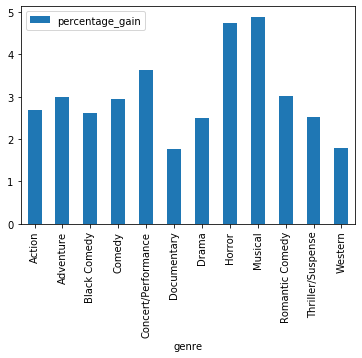

In [513]:
opus_data_for_graph.reset_index().plot('genre', 'percentage_gain', kind='bar');
#look at average percent gain by genre

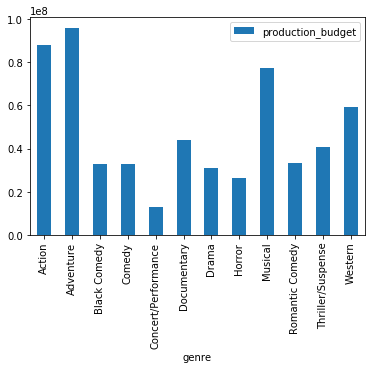

In [512]:
opus_data_for_graph.reset_index().plot('genre', 'production_budget', kind='bar'); #comparing that with production budget by genre

This analysis shows that the horror genre is the big winner in that it is the second highest mean percent gain, while also being the second lowest for mean production budget. Concert/Performance was also suprisingly viable with the third highest percent gain as well as the absolute lowest production budget mean. Both romantic comedy and general comedy were tied for a 3rd place finish as they were the 4th highest percentage gain, while having the third lowest production budget. In the end, Microsoft should focus on an international streaming audience. They should shoot for movie production budgets in the \\$20-\\$50 million range for production budget and they should make those films in the Horror, Concert/Performance and Comedy(Romantic as well) genres.